In [41]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
# import plotly.graph_objects as go

#Data Preprocessing
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Models ML
from sklearn.neighbors import KNeighborsClassifier
#Metrics
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
# from sklearn.metrics import roc_curve, auc

In [42]:
data = pd.read_csv(r"C:\Users\Asus\Downloads\diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [44]:
data.describe()
#glucose level 0 and 0 blood pressure...... indicates that there are mistakes in the dataset. so, we need to remove the unusual data.  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [45]:
#columns of unusual data are taken for further inspection
select_col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
select_col_df = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]
select_col_df = select_col_df.describe()
select_col_df
#from the observed data in the columns, unusual data can be discussed with experts in the domain.

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578
std,31.972618,19.355807,15.952218,115.244002,7.884160
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000
50%,117.000000,72.000000,23.000000,30.500000,32.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


In [46]:
mean_value = select_col_df.iloc[1:2,:]
mean_value
#checking the mean value so that we can analyse and put average values in the places where the data are zero

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
mean,120.894531,69.105469,20.536458,79.799479,31.992578


In [47]:
for i in select_col_df:
    print(data[i].median())

117.0
72.0
23.0
30.5
32.0


In [48]:
'''Replacing the values equal to 0 by the median since the 0 values in the data could easily have affected the mean value so we're replacing median
(always inspect mean first and put whatever is suitable)'''
for col in data[select_col_df]:
    data.loc[:,col].replace(0, data.loc[:,col].median(), inplace=True)
    print(data.loc[:,col])

0       6
1       1
2       8
3       1
4       3
       ..
763    10
764     2
765     5
766     1
767     1
Name: Pregnancies, Length: 768, dtype: int64
0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64
0      72
1      66
2      64
3      66
4      40
       ..
763    76
764    70
765    72
766    60
767    70
Name: BloodPressure, Length: 768, dtype: int64
0      35
1      29
2      23
3      23
4      35
       ..
763    48
764    27
765    23
766    23
767    31
Name: SkinThickness, Length: 768, dtype: int64
0       30.5
1       30.5
2       30.5
3       94.0
4      168.0
       ...  
763    180.0
764     30.5
765    112.0
766     30.5
767     30.5
Name: Insulin, Length: 768, dtype: float64
0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64
0      0.627

C:\Users\Asus\AppData\Local\Temp\ipykernel_9284\3284718102.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.loc[:,col].replace(0, data.loc[:,col].median(), inplace=True)


In [49]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.278646,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.021516,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


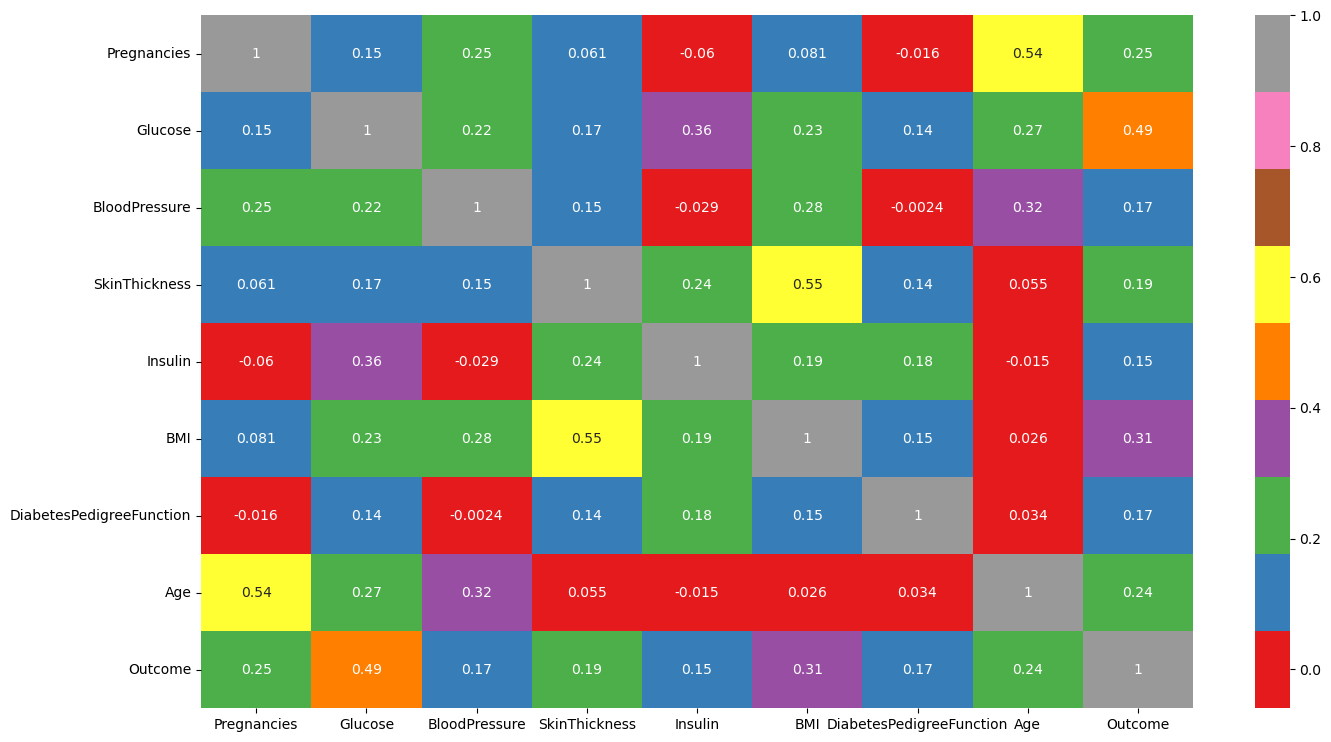

In [50]:
plt.figure(figsize=(16,9))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='Set1')
plt.show()


In [51]:
'''outcome is 'y' and 'x' is everything but outcome'''
# training and normalization of data
X = data.iloc[:,:8]
Y = data.iloc[:,8:]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=1)

# SScaler = StandardScaler()
# X_train = SScaler.fit_transform(X_train)
# X_test = SScaler.fit_transform(X_test)

In [52]:
'''before moving forward in KNN k's(n_neighbors) value muist be fixed so,we itirated the values from 1 to 30.
we observe the train acc and test acc to get the best values for k'''
test_accuracy = []
test_mse_value = []
train_accuracy = []
train_mse_value = []

for i in range(1,30):
  KNN= KNeighborsClassifier(n_neighbors=i)
  KNN.fit(X_train,Y_train)
  test_pred = KNN.predict(X_test)
  train_pred = KNN.predict(X_train)

  test_acc= round(accuracy_score(Y_test,test_pred), 5)*100 # Accuracy
  train_acc= round(accuracy_score(Y_train,train_pred), 5)*100 # Accuracy

  mse1 = round(mean_squared_error(Y_test,test_pred),3)
  mse2 = round(mean_squared_error(Y_train,train_pred),3)

  test_accuracy.append(test_acc)
  train_accuracy.append(train_acc)

  test_mse_value.append(mse1)
  train_mse_value.append(mse2)



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

In [53]:
print(train_accuracy)

[100.0, 83.71300000000001, 85.342, 80.782, 80.456, 78.50200000000001, 78.664, 77.687, 78.013, 78.176, 78.013, 77.362, 76.873, 76.059, 76.384, 76.873, 76.71, 76.71, 75.73299999999999, 76.221, 76.384, 76.547, 75.73299999999999, 76.384, 75.896, 76.547, 77.036, 76.059, 75.57000000000001]


In [54]:
print(test_accuracy)

[71.429, 74.675, 76.62299999999999, 76.62299999999999, 73.37700000000001, 75.974, 74.675, 75.325, 74.026, 73.37700000000001, 74.026, 74.675, 75.974, 77.922, 79.221, 77.922, 77.273, 75.974, 74.675, 73.37700000000001, 74.026, 76.62299999999999, 75.325, 74.675, 73.37700000000001, 75.974, 75.974, 75.974, 75.974]


In [55]:
print(test_mse_value)

[0.286, 0.253, 0.234, 0.234, 0.266, 0.24, 0.253, 0.247, 0.26, 0.266, 0.26, 0.253, 0.24, 0.221, 0.208, 0.221, 0.227, 0.24, 0.253, 0.266, 0.26, 0.234, 0.247, 0.253, 0.266, 0.24, 0.24, 0.24, 0.24]


In [56]:
print(train_mse_value)

[0.0, 0.163, 0.147, 0.192, 0.195, 0.215, 0.213, 0.223, 0.22, 0.218, 0.22, 0.226, 0.231, 0.239, 0.236, 0.231, 0.233, 0.233, 0.243, 0.238, 0.236, 0.235, 0.243, 0.236, 0.241, 0.235, 0.23, 0.239, 0.244]


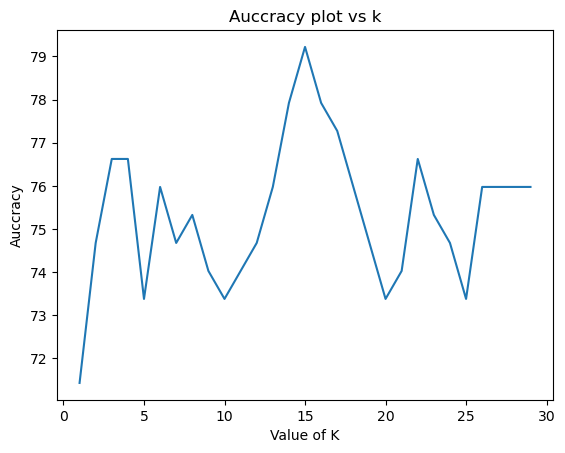

In [58]:
#plotting test accuracy first in order to observe what value of k gives the best result

import matplotlib.pyplot as plt
x = [i for i in range(1,30)]
y = test_accuracy
plt.plot(x,y)
plt.title('Auccracy plot vs k')
plt.xlabel('Value of K')
plt.ylabel('Auccracy')
plt.show()

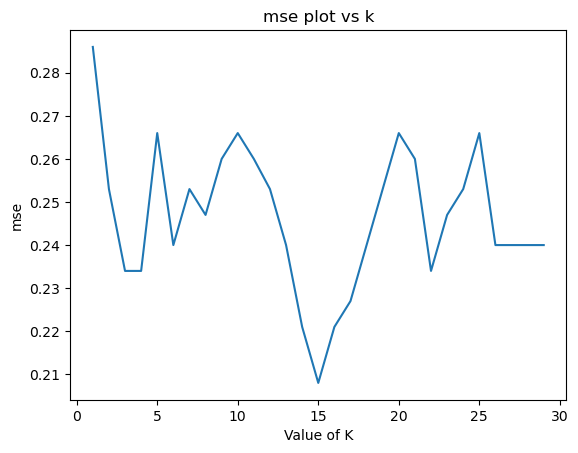

In [59]:
#mse value must be decreasing but it decreases slowlyS
import matplotlib.pyplot as plt
x = [i for i in range(1,30)]
y1 = test_mse_value
plt.plot(x,y1)
plt.title('mse plot vs k')
plt.xlabel('Value of K')
plt.ylabel('mse')
plt.show()

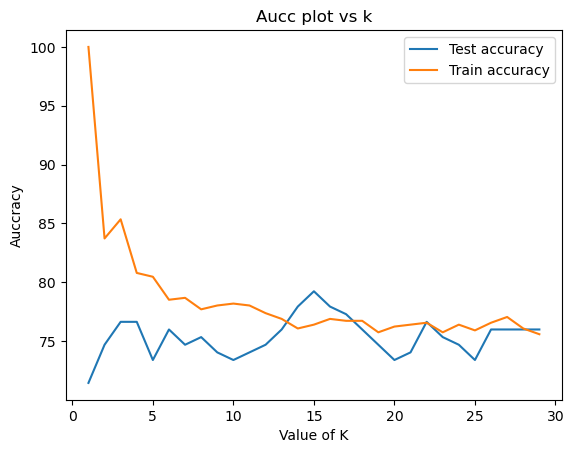

In [60]:
#both graphs are combined in order to select best value of k
import matplotlib.pyplot as plt
x = [i for i in range(1,30)]
y = test_accuracy
y1 = train_accuracy
plt.plot(x,y,label = 'Test accuracy')
plt.plot(x,y1,label = 'Train accuracy')

plt.title('Aucc plot vs k')
plt.xlabel('Value of K')
plt.ylabel('Auccracy')
plt.legend()
plt.show()

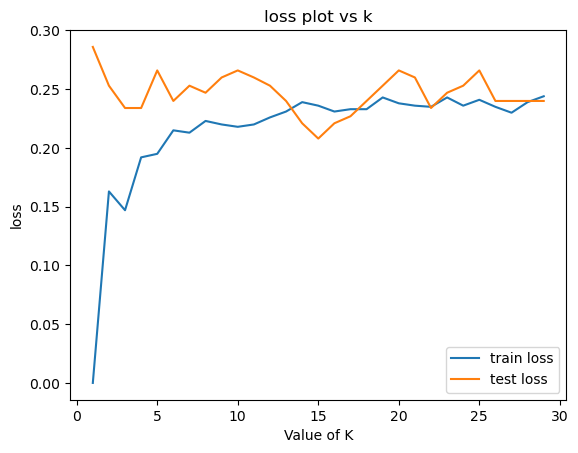

In [61]:
#the points must intersect or be nearest at almost the same value of k
import matplotlib.pyplot as plt
x = [i for i in range(1,30)]
y = train_mse_value
y1 = test_mse_value
plt.plot(x,y,label = 'train loss')
plt.plot(x,y1,label = 'test loss')

plt.title('loss plot vs k')
plt.xlabel('Value of K')
plt.ylabel('loss')
plt.legend()
plt.show()

In [69]:
KNN = KNeighborsClassifier(n_neighbors=15)
KNN.fit(X_train,Y_train)
Y_pred= KNN.predict(X_test)

KNN_accuracy= round(accuracy_score(Y_test,Y_pred), 5)*100 # Accuracy
print(KNN_accuracy)

79.221


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


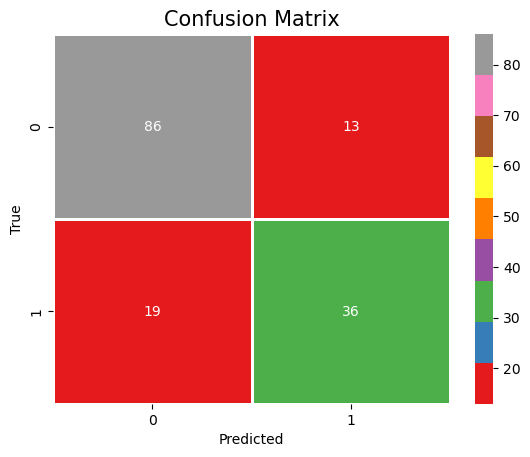

In [71]:

cm=confusion_matrix(Y_test,Y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm,annot=True,cmap='Set1',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()



In [72]:
#predicting values new data
new_data = {'Pregnancies':[3],'Glucose':[120],'BloodPressure':[80],'SkinThickness':[30],'Insulin':[110],'BMI':[25],'DiabetesPedigreeFunction':[0.66],'Age':[40]}
d1 = pd.DataFrame(new_data)
d1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3,120,80,30,110,25,0.66,40


In [73]:
Y_score = KNN.predict(d1)[0]
print(Y_score)

0
